## Describing a Single Set of Data

In [1]:
%matplotlib inline
import csv
from collections import Counter
from matplotlib import pyplot as plt
import math

num_friends = []
with open('friends.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        num_friends = [int(r) for r in row]
        
print(num_friends[:20])

[100, 49, 41, 40, 25, 21, 21, 19, 19, 18, 18, 16, 15, 15, 15, 15, 14, 14, 13, 13]


In [2]:
friend_counts = Counter(num_friends)
friend_counts

Counter({1: 22, 6: 22, 3: 20, 4: 20, 9: 18, 2: 17, 5: 17, 7: 15, 10: 15, 8: 13, 13: 4, 15: 4, 12: 2, 14: 2, 18: 2, 19: 2, 21: 2, 11: 1, 16: 1, 25: 1, 100: 1, 40: 1, 41: 1, 49: 1})

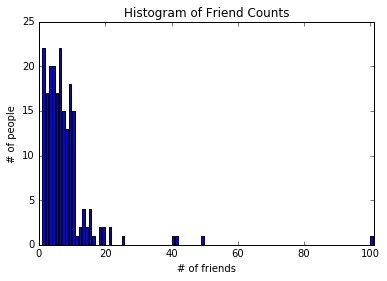

In [3]:
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

This chart is still too difficult to slip into conversations. Let's generate some statistics.

In [4]:
nun_pounts = len(num_friends)
print("Number of datapoint " , nun_pounts)

Number of datapoint  204


In [5]:
largest_value = max(num_friends)
smallest_value = min(num_friends)
print("Largest value {0}".format(largest_value))
print("Smallest value {0}".format(smallest_value))

Largest value 100
Smallest value 1


In [6]:
sorted_values = sorted(num_friends)
print("Small value ", sorted_values[0])
print("Second small value ", sorted_values[1])
print("Second largest value ", sorted_values[-2])

Small value  1
Second small value  1
Second largest value  49


## Central Tendencies

where our data is centered?

### Mean

In [7]:
def mean(x):
    return sum(x) / len(x)

print(mean(num_friends))

7.333333333333333


In [8]:
import numpy as np

print("Mean: ", np.mean(num_friends))

Mean:  7.33333333333


### Median

the middle-most value (if the number of data points is odd) or the average of the two middle-most values (if the
number of data points is even)

In [9]:
def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    if n % 2 == 1:
        # it's odd
        return sorted_v[midpoint]
    
    lo = midpoint -1
    hi = midpoint
    return (sorted_v[lo] + sorted_v[hi]) / 2

print("Median ", median(num_friends))

Median  6.0


In [10]:
print("Median ", np.median(num_friends))

Median  6.0


The **mean** is very sensitive to outliers in our data.
A generalization of the median is the **quantile**, which represents the value less than which a certain percentile of the data lies. (The median represents the value less than which 50% of the data lies.)

### Quantile (or percentile)

In [11]:
def quantile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]

for p in [0.10, 0.25, 0.75, 0.90]:
    print("Quantile {0} - {1}".format(p, quantile(num_friends, p)) )

Quantile 0.1 - 1
Quantile 0.25 - 3
Quantile 0.75 - 9
Quantile 0.9 - 13


In [12]:
# with numpy
for p in [0.10, 0.25, 0.75, 0.90]:
    print("Quantile {0} - {1}".format(p, np.percentile(num_friends, p*100)) )

Quantile 0.1 - 1.0
Quantile 0.25 - 3.0
Quantile 0.75 - 9.0
Quantile 0.9 - 13.0


Less commonly you might want to look at the **mode**, or most-common value[s]:

### Mode

In [13]:
def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

print(mode(num_friends))

[1, 6]


## Dispersion

measures of how spread out our data is. 
Typically they’re statistics for which values near zero signify not spread out at all and for which large values
(whatever that means) signify very spread out.

### Data Range

In [14]:
def data_range(x):
    return max(x) - min(x)

print("Data range {0}".format(data_range(num_friends)))

Data range 99


### Variance

In [15]:
def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum([x*x for x in deviations]) / (n -1)

variance(num_friends)

81.54351395730716

In [16]:
# with numpy
print("Variance ", np.var(num_friends))

Variance  81.1437908497


### Standard deviation

In [17]:
def standard_deviation(x):
    return math.sqrt(variance(x))

print(standard_deviation(num_friends))

9.03014473623248


## Correlation

We’d like to investigate the relationship between two metrics.

In [18]:
daily_minutes = []
with open('daily_minutes.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        daily_minutes = [float(r) for r in row]
        
print(daily_minutes[:20])

[1.0, 68.77, 51.25, 52.08, 38.36, 44.54, 57.13, 51.4, 41.42, 31.22, 34.76, 54.01, 38.79, 47.59, 49.1, 27.66, 41.03, 36.73, 48.65, 28.12]


### Covariance

Whereas variance measures how a single variable deviates from its mean, covariance measures how two variables vary in tandem from their means.

In [19]:
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

covariance(num_friends, daily_minutes)

22.425435139573064

In [20]:
# with numpy
print("Covariance ", np.cov(num_friends, daily_minutes, ddof=0)[0][1])

Covariance  22.3155065359


A “large” **positive covariance** means that x tends to be large when y is large and small when y is small. A “large” **negative covarian** means the opposite—that x tends to be small when y is large and vice versa. A covariance close to zero means that no such relationship exists.

Nonetheless, this number can be hard to interpret.

It’s more common to look at the **correlation**, which divides out the standard deviations of both variables

## Correlation

In [21]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0

correlation(num_friends, daily_minutes)

0.24736957366478218

The **correlation is unitless** and always lies between -1 (perfect anti-correlation) and 1 (perfect correlation). 

A number like 0.25 represents a relatively weak positive corre‐lation.

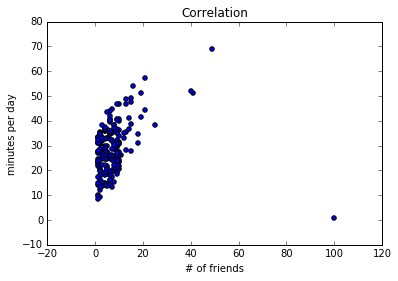

In [28]:
def show_correlation(x, y):
    plt.scatter(x, y)
    plt.title("Correlation")
    plt.xlabel("# of friends")
    plt.ylabel("minutes per day")
    plt.show()
    
show_correlation(num_friends, daily_minutes)

### Outlier

In [24]:
num_friends.index(100)

0

In [25]:
daily_minutes[0]

1.0

The person with 100 friends (who spends only one minute per day on the site) is a
huge outlier, and correlation can be very sensitive to outliers. What happens if we
ignore him?

In [27]:
outlier = num_friends.index(100)

num_friends_good = [x for i, x in enumerate(num_friends) if i != outlier]

daily_minutes_good = [x for i, x in enumerate(daily_minutes) if i != outlier]

print("Correlation ", correlation(num_friends_good, daily_minutes_good))

Correlation  0.5736792115665573


Without the outlier, there is a much **stronger correlation**

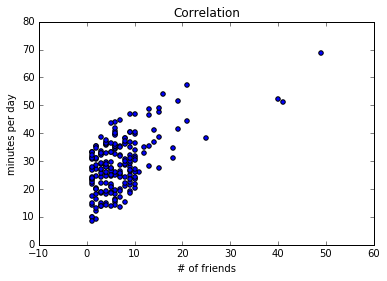

In [29]:
show_correlation(num_friends_good, daily_minutes_good)

## Simpson's Paradox

[![Everything Is AWESOME](http://img.youtube.com/vi/wgLUDw8eLB4/0.jpg)](https://www.youtube.com/watch?v=wgLUDw8eLB4 "Simpson's Paradox")

Correlation is measuring the relationship between your two variables **all else being
equal**. If your data classes are assigned at random, as they might be in a well-designed
experiment, “all else being equal” might not be a terrible assumption. But when there
is a deeper pattern to class assignments, “all else being equal” can be an awful assump‐
tion.

## Other Correlational Caveats

A correlation of zero indicates that there is no linear relationship between the two
variables.

However, there may be other sorts of relationships

In [32]:
x = [-2, -1, 0, 1, 2]
y = [ 2, 1, 0, 1, 2]

print("Correlation ", correlation(x, y))

Correlation  0.0


But they certainly have a relationship—each element of y equals the **absolute value** of the corresponding element of x

## Correlation and Causation

You have probably heard at some point that **“correlation is not causation,”** most likely
by someone looking at data that posed a challenge to parts of his worldview that he was reluctant to question. Nonetheless, this is an important point—if x and y are strongly correlated, that might mean that x causes y , that y causes x , that each causes the other, that some third factor causes both, or it might mean nothing.